In [68]:
import numpy as np
import random
from scipy.special import erfinv
import pandas as pd
import pandas
from sklearn.neighbors import KNeighborsClassifier
import random
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [22]:
df_outdoor = pandas.read_csv('outdoor.csv')
df_indoor = pandas.read_csv('indoor.csv')
df_indoor = df_indoor.drop('No', axis=1)

In [23]:
df_outdoor['is_indoor'] = False
df_indoor['is_indoor'] = True

df = df_outdoor.append(df_indoor)

In [26]:
df.groupby(['distance','is_indoor']).count()
df.groupby(['distance','is_indoor']).count().to_csv('groupby_count.csv')

In [29]:
df.groupby(['distance','is_indoor']).mean().to_csv('groupby_mean.csv')

In [54]:
df.groupby(['distance','is_indoor']).describe()

Signal strength (dBm)                                     \
                                   count       mean        std    min   25%   
distance is_indoor                                                            
1        False                     901.0 -38.932297  22.199571 -112.0 -51.0   
         True                     4403.0 -33.634113   4.018007  -41.0 -38.0   
2        False                     604.0 -52.700331  24.575492 -116.0 -68.0   
         True                     4403.0 -33.634113   4.018007  -41.0 -38.0   
3        False                    4697.0 -69.131148  10.935863 -149.0 -71.0   
         True                     9992.0 -36.888511   4.059040  -44.0 -41.0   
4        False                    3682.0 -71.118142  12.807496 -150.0 -75.0   
         True                     5358.0 -34.761851   4.026006  -49.0 -39.0   
5        False                     846.0 -68.841608  22.085974 -134.0 -81.0   
         True                     6476.0 -38.847437   3.995775  -46.0 -43.0   
6        False                     979.0 -70.157303  22.419585 -156.0 -81.0   
         True                     5371.0 -37.927574   4.040503  -45.0 -42.0   
7        False                     909.0 -72.734873  23.899964 -147.0 -89.0   
         True                     5607.0 -41.868022   4.206843  -51.0 -46.0   
8        False                     615.0 -73.547967  25.401157 -173.0 -91.0   
         True                     6484.0 -38.034701   6.838648  -52.0 -44.0   
9        False                     644.0 -75.462733  24.659804 -145.0 -92.0   
         True                     4518.0 -41.932935   4.004555  -48.0 -46.0   
10       False                     672.0 -77.389881  24.658558 -160.0 -95.0   
         True                     7556.0 -41.762970   4.522178  -50.0 -45.0   

                                       
                     50%    75%   max  
distance is_indoor                     
1        False     -38.0 -27.00  43.0  
         True      -31.0 -30.00 -28.0  
2        False     -53.5 -37.75  27.0  
         True      -31.0 -30.00 -28.0  
3        False     -69.0 -68.00  18.0  
         True      -40.0 -33.00 -26.0  
4        False     -73.0 -68.00   5.0  
         True      -32.0 -31.00 -27.0  
5        False     -71.0 -56.00   6.0  
         True      -36.0 -35.00 -26.0  
6        False     -71.0 -59.00  25.0  
         True      -35.0 -34.00 -28.0  
7        False     -74.0 -59.00   3.0  
         True      -44.0 -38.00 -16.0  
8        False     -72.0 -57.00  -1.0  
         True      -37.0 -35.00 -16.0  
9        False     -75.5 -59.00  13.0  
         True      -39.0 -38.00 -34.0  
10       False     -77.0 -61.00  -8.0  
         True      -41.0 -37.00 -25.0

Text(0.5, 1.0, 'RSS Distributions -- Indoor')

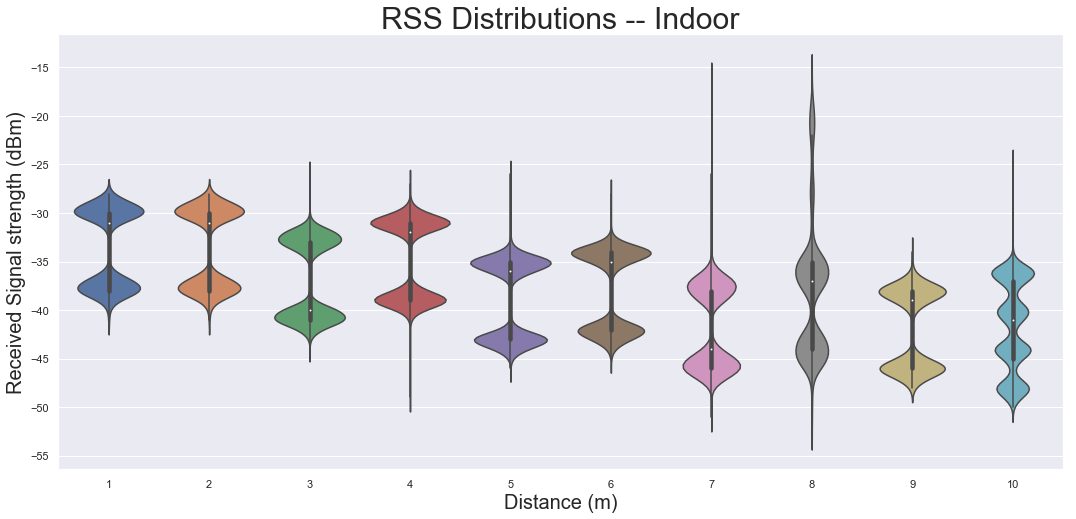

In [52]:
# train
from matplotlib import pyplot as plt
import seaborn
# sns.violinplot(data=df['Signal strength (dBm)'])
plt.figure(figsize=(18, 8))
seaborn.set(font_scale=1)
# seaborn.set(style="whitegrid")
seaborn.set(style="darkgrid")
b = sns.violinplot(x= df_indoor['distance'], y = df_indoor['Signal strength (dBm)'])
b.set_xlabel("Distance (m)",fontsize=20)
b.set_ylabel("Received Signal strength (dBm)",fontsize=20)
b.set_title("RSS Distributions -- Indoor", fontsize=30)

Text(0.5, 1.0, 'RSS Distributions -- Outdoor')

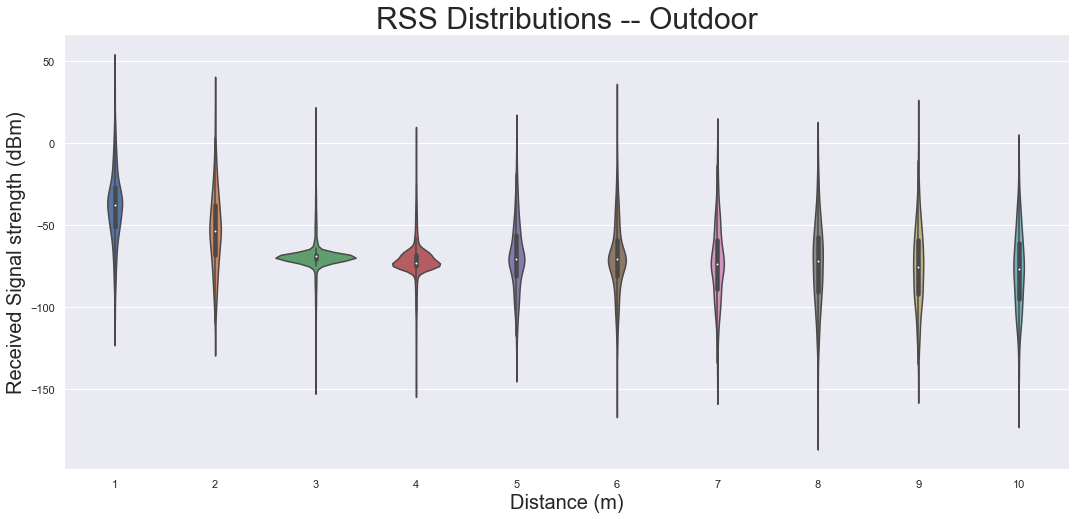

In [53]:
plt.figure(figsize=(18, 8))
seaborn.set(font_scale=1)
seaborn.set(style="darkgrid")
b = sns.violinplot(x= df_outdoor['distance'], y = df_outdoor['Signal strength (dBm)'])
b.set_xlabel("Distance (m)",fontsize=20)
b.set_ylabel("Received Signal strength (dBm)",fontsize=20)
b.set_title("RSS Distributions -- Outdoor", fontsize=30)

In [56]:
# modeling
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score

def train_model(df):
    df = shuffle(df)

    x = df.drop(['distance'],axis=1).values
    y = df['distance'].values

    split_point = int(len(x) * 0.9)
    X_train = x[:split_point]
    y_train = y[:split_point]
    X_test = x[split_point:]
    y_test = y[split_point:]
    assert len(X_train) == len(y_train)
    assert len(X_test) == len(y_test)
    
    # train a classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # predict the test set
    predictions = knn.predict(X_test)
    print("confusion_matrix:\n", confusion_matrix(y_test, predictions))
    print("precision:\t", precision_score(y_test, predictions, average='macro'))
    print("recall:\t\t", recall_score(y_test, predictions, average='macro'))
    print("accuracy:\t", accuracy_score(y_test, predictions))


In [59]:
train_model(df_indoor)

confusion_matrix:
 [[185 217   5  20   0   0   0   1  15   2]
 [179 215   7  17   0   0   0   3  17   7]
 [  0   0 731 173   1  59   0   0   6   0]
 [ 39  43  33 239   0   0   1   1 203   1]
 [  0   2  21   4 537  19   0   0   1  90]
 [  0   1 222   1 132 162   0   1   0   7]
 [ 78 114   0   0  36   1  57  96 155  25]
 [ 27 104  13   5 249   2   3 167  15  50]
 [131  36   0   6   1   0  46  38 190   5]
 [  5  67  57 115 151   0  12  35  15 290]]
precision:	 0.4674645757109013
recall:		 0.43560522690617204
accuracy:	 0.460860894133289


In [65]:
train_model(df_outdoor)

confusion_matrix:
 [[ 44  10   5   7   8   2   1   1   5   0]
 [ 26   7   8   9   0   3   0   0   3   0]
 [ 22   5 212 200   1   5   4   4   3   5]
 [ 12  11 135 211   5   5   3   2   1   2]
 [ 15  11  24  24   1   8   6   3   1   1]
 [ 14   8  26  35   1   8   1   3   2   6]
 [  7  13  21  26   1   8   3   0   4   5]
 [  3  10  11  12   1   7   0   2   1   2]
 [  8   1  16  15   1   8   2   3   3   4]
 [ 10  10   7  21   2   8   4   3   2   5]]
precision:	 0.18709430346717115
recall:		 0.19413033510570227
accuracy:	 0.340893470790378


In [86]:
# !compare the model
#  对比不同模型的accuracy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from warnings import simplefilter
# ignore all future warnings


def compare_model(df):
    x = df.drop('distance', axis=1).values
    y = df['distance'].values
    simplefilter(action='ignore', category=FutureWarning)

    classifiers = [KNeighborsClassifier(),
                   DecisionTreeClassifier(),
                   LinearDiscriminantAnalysis(),
                   LogisticRegression(),
                   GaussianNB(),
                   SVC(),
                  LinearRegression()]

    classifier_accuracy_list = []
    for i, classifier in enumerate(classifiers):
        # split the dataset into 5 folds; then test the classifier against each fold one by one
        accuracies = cross_val_score(classifier, x, y, cv=5)
        classifier_accuracy_list.append((accuracies.mean(), type(classifier).__name__))

    # sort the classifiers
    classifier_accuracy_list = sorted(classifier_accuracy_list, reverse=True)
    for item in classifier_accuracy_list:
        print(item[1], ':', item[0])

In [87]:


compare_model(df_indoor)

C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVC : 0.5575722574918739
DecisionTreeClassifier : 0.5575556310058818
KNeighborsClassifier : 0.4951997146273939
GaussianNB : 0.22410605368339653
LinearRegression : 0.22098539150063182
LinearDiscriminantAnalysis : 0.2139013059792513
LogisticRegression : 0.18001275290203286


In [88]:
compare_model(df_outdoor)

C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVC : 0.4321547892600434
DecisionTreeClassifier : 0.4309163483252442
KNeighborsClassifier : 0.3868596567248833
LinearDiscriminantAnalysis : 0.34174618970561593
LogisticRegression : 0.33555580104680666
GaussianNB : 0.3344325534075999
LinearRegression : -6.1099145512440405


In [82]:
import sklearn.model_selection


def compare_model_2(df):
    x = df.drop('distance', axis=1).values
    y = df['distance'].values
    simplefilter(action='ignore', category=FutureWarning)

    classifiers = [KNeighborsClassifier(),
                   DecisionTreeClassifier(),
                   LinearDiscriminantAnalysis(),
                   LogisticRegression(),
                   GaussianNB(),
                   SVC(),
                  LinearRegression()]

    classifier_accuracy_list = []
    for i, classifier in enumerate(classifiers):
#         loo = sklearn.model_selection.LeaveOneOut(len(y))
        # split the dataset into 5 folds; then test the classifier against each fold one by one
        accuracies = cross_val_score(classifier, x, y, scoring='neg_mean_squared_error', cv=5)
        classifier_accuracy_list.append((accuracies.mean(), type(classifier).__name__))
 
    # sort the classifiers
    classifier_accuracy_list = sorted(classifier_accuracy_list, reverse=True)
    for item in classifier_accuracy_list:
        print(item[1], ':', item[0])

In [83]:
compare_model_2(df_outdoor)

C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearRegression : -5.9426673155395076
GaussianNB : -7.359479843318317
DecisionTreeClassifier : -7.377802530213832
SVC : -7.45782840839791
LogisticRegression : -7.4743873533741105
LinearDiscriminantAnalysis : -7.557680306746026
KNeighborsClassifier : -7.862156025486681


In [85]:
compare_model_2(df_indoor)

C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aceca\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearRegression : -6.234443136474491
SVC : -7.264182429220578
DecisionTreeClassifier : -7.264199055706571
KNeighborsClassifier : -7.518103438751149
GaussianNB : -12.79446328242617
LinearDiscriminantAnalysis : -12.94204906281062
LogisticRegression : -12.99915117853393


In [177]:
from sklearn.metrics import r2_score
from sklearn.metrics import *
# from sklearn.metrics import max_error


def train(df):
    df = shuffle(df)

    x = df.drop(['distance'],axis=1).values
    y = df['distance'].values

    split_point = int(len(x) * 0.9)
    X_train = x[:split_point]
    y_train = y[:split_point]
    X_test = x[split_point:]
    y_test = y[split_point:]
    assert len(X_train) == len(y_train)
    assert len(X_test) == len(y_test)

    # train a classifier
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    # predict the test set
    predictions = regr.predict(X_test)
#     print("confusion_matrix:\n", confusion_matrix(y_test, predictions))
#     print("precision:\t", precision_score(y_test, predictions, average='macro'))
#     print("recall:\t\t", recall_score(y_test, predictions, average='macro'))
#     print("accuracy:\t", accuracy_score(y_test, predictions))
    print("mean_squared_error:", mean_squared_error(y_test, predictions))
    print("Coefficient of determination(R2):", r2_score(y_test, predictions))
    print("explained_variance_score:",explained_variance_score(y_test, predictions, multioutput='uniform_average'))
#     print(max_error(y_test, predictions))
    print("coefficiency:",regr.coef_)
#     print(len(X_test),len(y_test))
#     sns.scatterplot(x=X_test, y=y_test,  color='black')
    x= np.array([1,2,3,4,5,6,7,8,9,10]).reshape(1, -1)
    y=regr.predict(x)
    sns.scatterplot(x=x, y=y, color='blue')

#     plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

In [178]:
train(df_indoor)
# train(df_outdoor)

mean_squared_error: 6.222328903238103
Coefficient of determination(R2): 0.22910497185272216
explained_variance_score: 0.23004198630209394
coefficiency: [-0.24802457  0.        ]


ValueError: shapes (1,10) and (2,) not aligned: 10 (dim 1) != 2 (dim 0)

array([5.00073047, 4.51657953, 6.49104136, ..., 4.51657953, 6.15986116,
       5.01334983])

In [183]:
df.sort_index().to_csv('both_indoor_and_outdoor.csv')
